# Feature selection by Sklearn -- Titanic 

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [2]:
# loading data 
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print('train_df:',train_df.shape, 'test_df:', test_df.shape)

combined_df= pd.concat([train_df, test_df]) 
combined_df.head()

train_df: (891, 12) test_df: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
combined_df['Age']=combined_df['Age'].fillna(combined_df['Age'].mean())
combined_df['Fare']=combined_df['Fare'].fillna(combined_df['Fare'].mean())
combined_df['Cabin']=combined_df['Cabin'].fillna('Unknow')
# combined_df['Cabin'].value_counts()
combined_df['Embarked'].value_counts()
combined_df['Embarked']=combined_df['Embarked'].fillna('S')

combined_df.Sex = combined_df.Sex.replace({'male':1,'female':0}).astype(np.uint8)

embarkedDF = pd.DataFrame()
embarkedDF = pd.get_dummies(combined_df['Embarked'],prefix='Embarked')

combined_df = pd.concat([combined_df,embarkedDF],axis=1)

combined_df = combined_df.drop(columns=['Embarked'])

pclassDf = pd.DataFrame()
pclassDf = pd.get_dummies(combined_df['Pclass'], prefix = 'Pclass')
combined_df = pd.concat([combined_df,pclassDf], axis=1)
combined_df = combined_df.drop(columns=['Pclass'])

titleDf = pd.DataFrame()
def getTitle(name):
    str1 = name.split(',')[1]
    str2 = str1.split('.')[0]
    str3 = str2.strip()
    return str3

titleDf['Title']= combined_df['Name'].map(getTitle)

title_mapDict = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
                    }
titleDf['Title'] = titleDf['Title'].map(title_mapDict)
titleDf = pd.get_dummies(titleDf['Title'])
combined_df = pd.concat([combined_df,titleDf],axis=1)
combined_df = combined_df.drop(columns=['Name'])

cabinDf = pd.DataFrame()
combined_df['Cabin'] = combined_df['Cabin'].map(lambda c : c[0])
cabinDf = pd.get_dummies(combined_df['Cabin'],prefix = 'Cabin' )
combined_df = pd.concat([combined_df,cabinDf],axis=1)
combined_df = combined_df.drop(columns=['Cabin'])

# new dataframe for family numbers include Parch, SibSp and self
familyDf = pd.DataFrame()
familyDf['FamilySize'] = combined_df['Parch'] + combined_df[ 'SibSp' ] + 1
familyDf['Family_Single'] = familyDf['FamilySize'].map( lambda s : 1 if s == 1 else 0 )
familyDf['Family_Small']  = familyDf['FamilySize'].map( lambda s : 1 if 2 <= s <= 4 else 0 )
familyDf['Family_Large']  = familyDf['FamilySize'].map( lambda s : 1 if 5 <= s else 0 )
combined_df = pd.concat([combined_df,familyDf],axis=1)

# survived 
SurvivedDf = pd.DataFrame()
SurvivedDf['Survived_new'] = combined_df['Survived'].fillna(0)
combined_df = pd.concat([combined_df, SurvivedDf], axis=1)
combined_df = combined_df.drop(columns=['Survived'])


combined_df.head()

# print(combined_df.dtypes) # 选X

,PassengerId,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,FamilySize,Family_Single,Family_Small,Family_Large,Survived_new
0,1,1,22.0,1,0,A/5 21171,7.2500,0,0,1,...,0,0,0,0,1,2,0,1,0,0.0
1,2,0,38.0,1,0,PC 17599,71.2833,1,0,0,...,0,0,0,0,0,2,0,1,0,1.0
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,...,0,0,0,0,1,1,1,0,0,1.0
3,4,0,35.0,1,0,113803,53.1000,0,0,1,...,0,0,0,0,0,2,0,1,0,1.0
4,5,1,35.0,0,0,373450,8.0500,0,0,1,...,0,0,0,0,1,1,1,0,0,0.0


In [4]:
combined_df['Ticket'].value_counts()
combined_df.drop_duplicates()['Ticket'].value_counts()
combined_df.loc[combined_df['Ticket']=='CA. 2343']
combined_df = combined_df.drop(columns=['Ticket'])
combined_df = combined_df.drop(columns=['PassengerId'])

In [5]:
combined_df.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,FamilySize,Family_Single,Family_Small,Family_Large,Survived_new
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,1,2,0,1,0,0.0
1,0,38.0,1,0,71.2833,1,0,0,1,0,...,0,0,0,0,0,2,0,1,0,1.0
2,0,26.0,0,0,7.9250,0,0,1,0,0,...,0,0,0,0,1,1,1,0,0,1.0
3,0,35.0,1,0,53.1000,0,0,1,1,0,...,0,0,0,0,0,2,0,1,0,1.0
4,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,1,1,1,0,0,0.0


In [6]:
X = combined_df.iloc[:,:-1]
X

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,FamilySize,Family_Single,Family_Small,Family_Large
0,1,22.000000,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,1,2,0,1,0
1,0,38.000000,1,0,71.2833,1,0,0,1,0,...,0,0,0,0,0,0,2,0,1,0
2,0,26.000000,0,0,7.9250,0,0,1,0,0,...,0,0,0,0,0,1,1,1,0,0
3,0,35.000000,1,0,53.1000,0,0,1,1,0,...,0,0,0,0,0,0,2,0,1,0
4,1,35.000000,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1,29.881138,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,1,1,0,0
414,0,39.000000,0,0,108.9000,1,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
415,1,38.500000,0,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,1,1,1,0,0
416,1,29.881138,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,1,1,0,0


In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(combined_df), 50))
# add noise features to the data

y = combined_df['Survived_new']
X_w_noise = np.hstack([X, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, y, random_state=0, test_size=.5)
# use f_classif (the default) and SelectPercentile to select 10% of features:
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform training set:
X_train_selected = select.transform(X_train)

print(X_train.shape)
print(X_train_selected.shape)

(654, 80)
(654, 40)


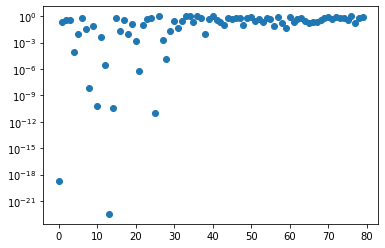

In [8]:
from sklearn.feature_selection import f_classif, f_regression, chi2
import matplotlib.pyplot as plt
F, p = f_classif(X_train, y_train)
plt.figure()
plt.semilogy(p, 'o')

[ True  True False False  True  True False  True  True  True  True  True
  True  True  True False  True False  True  True  True  True  True False
 False  True False  True  True  True  True  True False False False  True
 False False  True False False False  True  True False False False False
  True False False  True False  True False False  True False  True  True
 False  True False False  True  True  True  True False False False False
 False False False False False  True False False]


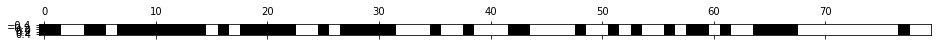

In [9]:
mask = select.get_support()
print(mask)
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [10]:
from sklearn.linear_model import LogisticRegression

# transform test data:
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: %f" % lr.score(X_test, y_test))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: %f" % lr.score(X_test_selected, y_test))

Score with all features: 0.757252
Score with only selected features: 0.766412


/Users/xuechunwang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/xuechunwang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

## Model-based feature Selection

In [11]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(random_state=42),
                         threshold="median")

In [12]:
select.fit(X_train, y_train)
X_train_rf = select.transform(X_train)
print(X_train.shape)
print(X_train_rf.shape)

(654, 80)
(654, 40)


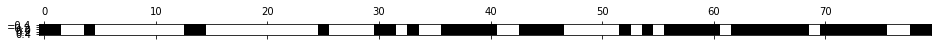

In [13]:
mask = select.get_support()
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [14]:
X_test_rf = select.transform(X_test)
LogisticRegression().fit(X_train_rf, y_train).score(X_test_rf, y_test)

/Users/xuechunwang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7618320610687023